# Project: Sleep and Lifestyle Analysis
This project aims to investigate the factors associated with sleep quality using the publicly available dataset 'Sleep Health and Lifestyle'.

We will explore the data, clean and preprocess it, perform exploratory analysis, and build predictive models to answer key questions about sleep health.

## 1. Introduction
Sleep-related problems affect millions of people and may be related to various factors such as stress, physical activity level, age, and more. This study seeks to understand how different lifestyle aspects influence sleep quality.

# 🔍 Proposed Analytical Questions

Based on the dataset content, we can explore several relevant analytical questions related to sleep and lifestyle. Some investigable questions include:

### What factors are associated with poor sleep quality?
For example, do individuals with high stress levels tend to report worse sleep quality? Do less physically active people sleep worse? Here we would analyze correlations between sleep quality scores and variables such as stress level, physical activity, etc.

### Are there relationships between daily habits (like physical activity or number of daily steps) and sleep duration?
We can investigate whether individuals who exercise more (more minutes or more steps) also tend to sleep more — or whether there’s a compensatory pattern.

### Are there demographic or occupational differences in sleep?
Does sleep quality or duration vary by gender or age group? Or by occupation (e.g., are more stressful jobs associated with shorter sleep duration)? We can explore whether specific occupational groups have lower average sleep hours.

### What is the impact of physical health indicators on sleep?
Do individuals in different BMI categories experience differences in sleep quality or duration? Are variables like blood pressure or heart rate correlated with sleep patterns (e.g., do people with hypertension sleep less or have more sleep disorders)?

### Can we predict the occurrence of sleep disorders?
Is it possible to predict whether a person has a sleep disorder (such as insomnia or sleep apnea) based on their lifestyle and health features? What characteristics distinguish those with a sleep disorder from those without? (e.g., higher stress levels in insomniacs). A classification model could be trained to identify key predictors of sleep disorders.



# 2. 🧾 Dataset Overview – Sleep Health and Lifestyle

The Sleep Health and Lifestyle Dataset contains approximately 400 observations, each representing an individual, and includes 13 variables related to sleep habits, physical health, and daily lifestyle. The dataset is provided in CSV format, with each row representing a different person.



### 📋 Dataset Variable Summary

| **Variable**         | **Description**                                                                 |
|----------------------|----------------------------------------------------------------------------------|
| `Person ID`          | Unique identifier for each individual (not used in analysis)                    |
| `Gender`             | Gender of the individual (Male or Female)                                       |
| `Age`                | Age in years                                                                     |
| `Occupation`         | Profession (e.g., Doctor, Teacher, Student, etc.)                               |
| `Sleep Duration`     | Hours of sleep per night                                                         |
| `Quality of Sleep`   | Self-rated sleep quality on a scale from 1 (worst) to 10 (best)                  |
| `Physical Activity`  | Daily physical activity in minutes                                               |
| `Stress Level`       | Self-reported stress level from 1 (low) to 10 (high)                             |
| `BMI Category`       | Body Mass Index category (e.g., Normal, Overweight, Obese)                       |
| `Blood Pressure`     | Systolic/Diastolic format (e.g., 120/80)                                         |
| `Heart Rate`         | Resting heart rate (beats per minute)                                            |
| `Daily Steps`        | Number of steps taken daily                                                      |
| `Sleep Disorder`     | Type of sleep disorder (None, Insomnia, or Sleep Apnea)                          |


## 🧠 Key Features of the Dataset:

* Includes both numerical (e.g., sleep duration, heart rate) and categorical (e.g., gender, occupation) data.

* Sleep quality and stress levels are measured on a 1–10 ordinal scale.

* Blood pressure is recorded as a string and should be split into systolic and diastolic for analysis.

* Useful for both descriptive analysis and predictive modeling (e.g., predicting sleep disorders).

## 3. Data Loading and Inspection

In this section, we will load the dataset from the CSV file and perform initial inspections to understand its structure. This includes importing necessary libraries, reading the CSV into a pandas DataFrame, and examining the first few rows and summary information.

### Importing Libraries

First, import the Python libraries that will be used for data manipulation, visualization, and modeling. We will use pandas for data handling, numpy for numerical operations, seaborn and matplotlib for visualization, and scikit-learn for modeling.

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set default style for plots
sns.set(style="whitegrid")
# Ensure plots appear inline in Jupyter
%matplotlib inline


### Loading the Dataset

Load the CSV dataset into a pandas DataFrame.

In [13]:
# Load the Sleep Health and Lifestyle dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [14]:
# Display the number of rows and columns
print("Dataset shape:", df.shape)

Dataset shape: (374, 13)


After loading, we print the shape of the DataFrame to see how many rows and columns we have, and then display the first few entries using head(). This helps verify that the data was read correctly and lets us inspect the raw values for each column.

In [15]:
# Show the first five rows to preview the data
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Inspecting Data Structure
We will now inspect the data types and basic information about each column using df.info(), and get summary statistics for numeric columns using df.describe().

In [16]:
# Get information about data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


The info() output will show each column's data type (e.g., int64, float64, object) and how many non-null values are present, which is useful for spotting missing data. Next, let's see summary statistics:

In [17]:
# Get descriptive statistics for numeric columns
df.describe().T  # transpose for easier reading


,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


The describe() output provides count, mean, standard deviation, min, max, and quartiles for numeric fields like Age, Sleep Duration, Quality of Sleep, etc. This gives us a quick sense of the ranges and central tendencies of these variables. For example, we might see the average sleep duration or average stress level in the sample.

*Initial observations*: By looking at the head of the dataset and summary stats, we can note things like the range of ages (e.g., are participants mostly 20-40 years old?), typical sleep durations, and distribution of sleep quality ratings. We might also notice if any column has obvious missing values or if categorical fields like Gender or BMI Category have inconsistent labeling (e.g., "Normal" vs "Normal Weight"). These observations will guide the data cleaning steps.

## 🧼 4. Data Cleaning

Before diving into analysis, we need to clean and preprocess the data. Data cleaning tasks include handling missing values, parsing and splitting the blood pressure into two separate numeric columns, dropping any unneeded columns, converting data types, and standardizing categorical values for consistency. Cleaning ensures our analysis and modeling are accurate and meaningful.

### 4.1 Handling Missing Values

First, we'll check for missing values in each column and decide how to handle them. If there are only a few missing values in numeric columns, we might fill them with mean/median or drop those rows. If categorical, maybe fill with a mode or "Unknown". We'll demonstrate checking for missing data:

#### ✅ Checking for Missing Values

In [18]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


If any column shows missing entries, we decide on a strategy. For example, let's say Occupation has some missing entries; we might fill them as "Unknown" or drop them if only a few. In this example, suppose the dataset is largely complete; if any missing values are found, we'll handle them:

In [19]:
# Example: If any missing values in Sleep Duration or Quality of Sleep, drop those rows
df = df.dropna(subset=["Sleep Duration", "Quality of Sleep"])
# For categorical columns, we could fill missing values (if any) with a placeholder
df['Occupation'] = df['Occupation'].fillna("Unknown")


*Note*: The actual strategy would depend on the context and amount of missing data. Here we apply a simple approach: ensure critical numeric fields have no missing data by dropping such rows, and fill missing categorical fields with "Unknown". After handling, we can verify no missing values remain:

In [20]:
# Verify that missing values have been handled
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


### 4.2 Splitting the Blood Pressure Column

The Blood Pressure column is in the format "Systolic/Diastolic" (e.g., "120/80"). We will split this into two separate numeric columns: Systolic_BP and Diastolic_BP for clarity and ease of analysis.

In [21]:
# Split 'Blood Pressure' into two columns: Systolic_BP and Diastolic_BP
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new BP columns to numeric types
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'], errors='coerce')


After splitting, we convert the new columns to numeric (they might initially be strings). We use `errors='coerce'` to handle any unexpected non-numeric values by converting them to NaN (though in a clean dataset we expect numeric strings). Now that we have these, we can drop the original `Blood Pressure` column:

In [22]:
# Drop the original 'Blood Pressure' column as it's no longer needed
df.drop('Blood Pressure', axis=1, inplace=True)


### 4.3 Dropping Unneeded Columns

The dataset contains a `Person ID` which is just an identifier with no analytical value. We will drop `Person ID` as well to avoid it being considered in analysis or modeling. If there are any other irrelevant columns, they would be dropped here too.

In [23]:
# Drop 'Person ID' column as it is just an identifier
df.drop('Person ID', axis=1, inplace=True)


Now the DataFrame should only contain the relevant features for our analysis.

### 🔍 Checking Column Names with `df.columns.tolist()`

Sometimes, when we get an error like `KeyError: 'ColumnName' not in index`, it's because the column name we wrote in the code does **not exactly match** the actual name in the dataset.

To avoid this and confirm the **exact column names**, we can use the following command:

```python
df.columns.tolist()
```

This returns a list of all column names in the DataFrame, exactly as they are written, including spaces and capitalization.

📌 **Example output:**
```python
['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 
 'Physical Activity Level', 'Stress Level', 'BMI Category', 
 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 
 'Systolic_BP', 'Diastolic_BP']
```

This helps us make sure we’re using the correct names in analysis, avoiding errors like misspelling `"Physical Activity Level"` as `"Physical Activity"`.


In [25]:
print(df.columns.tolist())


['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP']


### 4.4 Converting Column Types

Ensure each column has the appropriate data type. For instance, `Gender`, `Occupation`, `BMI Category`, and `Sleep Disorder` are categorical and might be kept as object (string) or converted to pandas categorical for convenience. `Age`, `Sleep Duration`, `Quality of Sleep`, `Physical Activity`, `Stress Level`, `Heart Rate`, `Daily Steps`, and the new BP columns should be numeric (int or float). We'll explicitly convert some columns if needed:

In [26]:
# Convert categorical columns to 'category' dtype for clarity (optional)
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Confirm numeric columns are indeed numeric
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                'Physical Activity Level', 'Stress Level', 'Heart Rate', 
                'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

print(df[numeric_cols].dtypes)



Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
Heart Rate                   int64
Daily Steps                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
dtype: object


If any numeric column was read as object (for example, if there were stray characters), we would convert it using `pd.to_numeric` similar to what we did for blood pressure.

### 4.5 Standardizing Categorical Values

Sometimes categorical entries might have inconsistent capitalization or spelling (e.g., "Male" vs "male", "Normal" vs "Normal Weight"). We should standardize these. Looking at our variables:
`Gender` should be standardized to "Male" or "Female".
`BMI Category` might have variations like "Normal" vs "Normal Weight" referring to the same thing. We can make them consistent.
`Sleep Disorder` categories ("None", "Insomnia", "Sleep Apnea") should be fine, but ensure no accidental typos (like "none" lowercase or extra spaces).

Let's standardize `BMI Category` and `Gender` as an example:

In [27]:
# Standardize Gender values to 'Male' and 'Female' only
df['Gender'] = df['Gender'].str.strip().str.title()  # strip spaces and title case (Male/Female)

# Standardize BMI Category values
df['BMI Category'] = df['BMI Category'].str.strip().str.capitalize()
# If "Normal Weight" and "Normal" are meant to be the same category, unify them:
df['BMI Category'] = df['BMI Category'].replace({"Normal weight": "Normal", "Normal Weight": "Normal"})


In the above, we ensure any "Normal Weight" entries become "Normal" for consistency, assuming they indicate a normal BMI range. We also trimmed whitespace just in case. We should also verify unique values in these categorical columns now:

In [28]:
# Display unique values of categorical columns to verify standardization
for col in ['Gender', 'BMI Category', 'Sleep Disorder']:
    print(col, "unique values:", df[col].unique())


Gender unique values: ['Male' 'Female']
BMI Category unique values: ['Overweight' 'Normal' 'Obese']
Sleep Disorder unique values: ['None', 'Sleep Apnea', 'Insomnia']
Categories (3, object): ['Insomnia', 'None', 'Sleep Apnea']


After these cleaning steps, our dataset is ready for analysis. We have handled missing data, parsed blood pressure, removed irrelevant fields, ensured correct types, and standardized categories. Now we can move on to exploring the data.

# 5. Exploratory Data Analysis (EDA)

In this section, we perform descriptive analysis and visualization to uncover patterns and relationships in the data. We will look at summary statistics, distributions of key variables, relationships between variables via scatter plots and box plots, and compute a correlation matrix for numeric features.

### 5.1 Descriptive Statistics

We already saw basic statistics using `describe()`. Let's examine specific aspects in more detail. For example, calculate the average sleep duration and quality, or find the counts of each sleep disorder type:

In [29]:
# Calculate some specific summary statistics
avg_sleep_hours = df['Sleep Duration'].mean()
avg_sleep_quality = df['Quality of Sleep'].mean()
sleep_disorder_counts = df['Sleep Disorder'].value_counts()

print(f"Average sleep duration (hrs): {avg_sleep_hours:.2f}")
print(f"Average sleep quality (1-10 scale): {avg_sleep_quality:.2f}")
print("\nCount of each Sleep Disorder category:")
print(sleep_disorder_counts)


Average sleep duration (hrs): 7.13
Average sleep quality (1-10 scale): 7.31

Count of each Sleep Disorder category:
None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64


This will give a sense of typical sleep in our sample and how common insomnia or sleep apnea are relative to having no disorder. 

We might also examine how many are male vs female, or in each BMI category:

In [30]:
# Gender distribution
print("\nGender distribution:")
print(df['Gender'].value_counts())

# BMI Category distribution
print("\nBMI Category distribution:")
print(df['BMI Category'].value_counts())



Gender distribution:
Male      189
Female    185
Name: Gender, dtype: int64

BMI Category distribution:
Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64


These counts and averages provide a high-level overview of the dataset composition. Next, let's visualize distributions.

### 5.2 Distribution of Sleep Duration and Quality

We will plot histograms (with kernel density estimates) for Sleep Duration and Quality of Sleep to see their distributions across individuals.

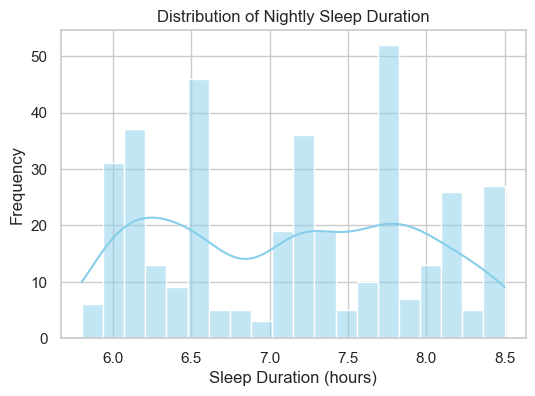

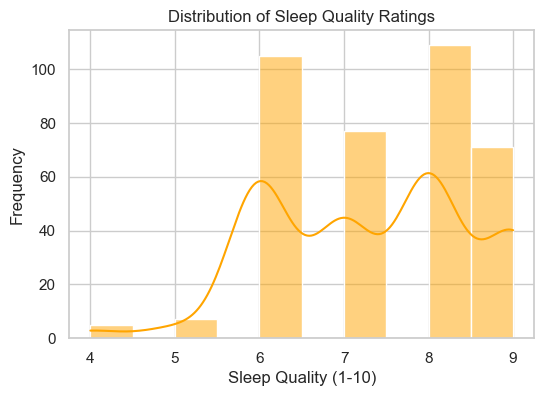

In [31]:
# Plot distribution of Sleep Duration
plt.figure(figsize=(6,4))
sns.histplot(df['Sleep Duration'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Nightly Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of Quality of Sleep
plt.figure(figsize=(6,4))
sns.histplot(df['Quality of Sleep'], kde=True, color='orange', bins=10)
plt.title("Distribution of Sleep Quality Ratings")
plt.xlabel("Sleep Quality (1-10)")
plt.ylabel("Frequency")
plt.show()


These histograms will show how sleep duration varies (e.g., do most people sleep around 6-8 hours? Are there many short sleepers?) and how people rate their sleep quality (possibly skewed toward higher values if most rate their sleep as decent). 

*Observation*: We might find that Sleep Duration approximates a normal distribution centered around 7 hours, or perhaps slightly skewed if many get less sleep. Sleep Quality might be fairly high on average (if many rate 6-8 out of 10), but seeing its distribution helps identify if a significant number report very poor sleep (low ratings).


### 5.3 Distribution of Other Numeric Variables

Let's also examine distributions of Stress Level and Physical Activity (minutes of exercise per day), as these are likely important factors, as well as Daily Steps.

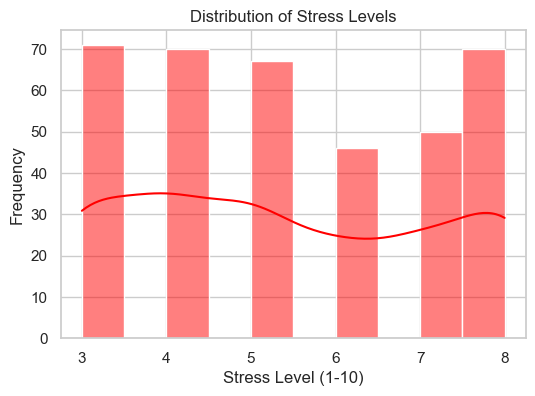

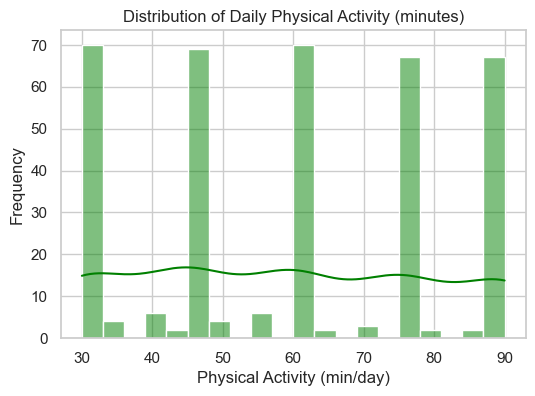

<AxesSubplot:xlabel='Physical Activity Level', ylabel='Count'>

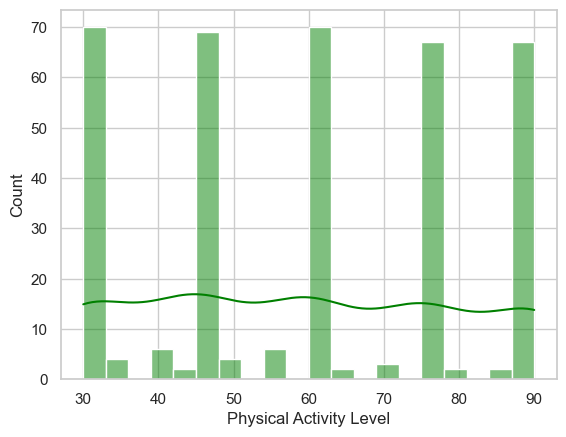

In [33]:
# Plot distribution of Stress Level
plt.figure(figsize=(6,4))
sns.histplot(df['Stress Level'], kde=True, color='red', bins=10)
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of Physical Activity
plt.figure(figsize=(6,4))
sns.histplot(df['Physical Activity Level'], kde=True, color='green', bins=20)
plt.title("Distribution of Daily Physical Activity (minutes)")
plt.xlabel("Physical Activity (min/day)")
plt.ylabel("Frequency")
plt.show()


sns.histplot(df['Physical Activity Level'], kde=True, color='green', bins=20)



These plots show how stress is distributed (likely a somewhat uniform or slightly skewed distribution on 1-10), and how active people are (physical activity minutes and step counts). We may observe, for instance, that many individuals report moderate stress levels (around 5-7) and a wide range of daily steps (some very active with ~10000 steps, some sedentary with only a few thousand).

### 5.4 Scatter Plots: Relationships Between Variables

To explore relationships, we'll create some scatter plots for pairs of variables that we hypothesize might be related:

*  Sleep Quality vs Stress Level: We expect a negative relationship (higher stress, lower sleep quality).
*  Sleep Duration vs Physical Activity Level: Possibly a positive relationship (more exercise might correlate with slightly longer sleep).
*  Sleep Quality vs Sleep Duration: People who sleep more might have better quality, up to a point.
*  Heart Rate vs Physical Activity or BMI: Could explore if higher resting heart rate correlates with lower activity or higher BMI.

Let's do a couple of these:

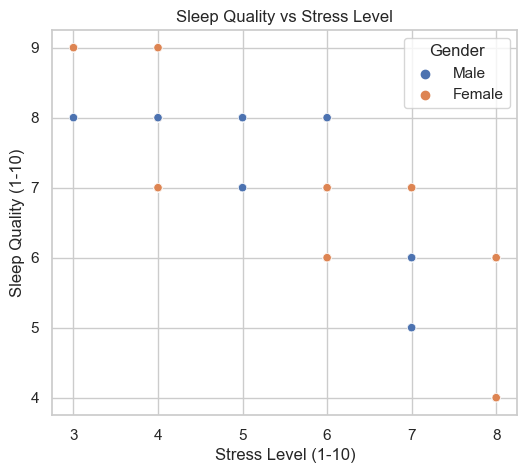

In [34]:
# Scatter plot: Sleep Quality vs Stress Level
plt.figure(figsize=(6,5))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df, hue='Gender')
plt.title("Sleep Quality vs Stress Level")
plt.xlabel("Stress Level (1-10)")
plt.ylabel("Sleep Quality (1-10)")
plt.legend(title='Gender')
plt.show()


In this scatter, we also color points by gender for an extra dimension (just to see if genders cluster differently). We anticipate points might slope downward (suggesting higher stress often coincides with lower sleep quality).

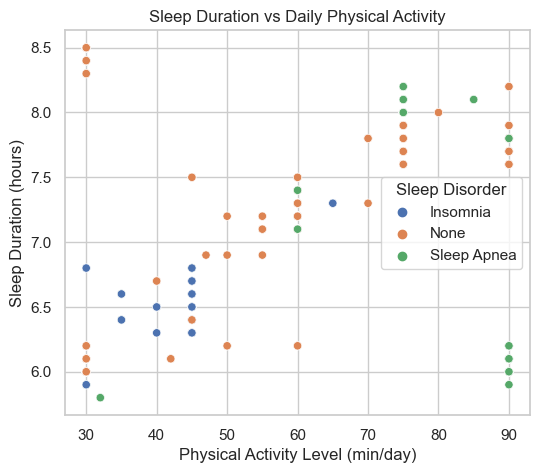

In [36]:
# Scatter plot: Sleep Duration vs Physical Activity Level
plt.figure(figsize=(6,5))
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', data=df, hue='Sleep Disorder')
plt.title("Sleep Duration vs Daily Physical Activity")
plt.xlabel("Physical Activity Level (min/day)")
plt.ylabel("Sleep Duration (hours)")
plt.legend(title='Sleep Disorder')
plt.show()


Here we color by sleep disorder status to see if those with disorders show different patterns. 
Possibly, those with no disorder might cluster differently than those with insomnia or apnea. 

*Observations*: We expect Stress vs Sleep Quality to show an inverse relationship (the plot likely showing a downward trend). Physical Activity Level vs Sleep Duration might show a slight upward trend or perhaps no strong pattern if moderate exercise doesn’t drastically change sleep hours; however, we might notice that extremely low activity or extremely high activity individuals have different sleep patterns.

### 5.5 Box Plots: Comparing Groups

We can use box plots to compare distributions of a continuous variable across categories. Some questions:

* Do people with sleep disorders have different sleep quality or duration than those without?
* Does sleep duration vary by BMI category or gender?

Let's compare Sleep Quality for each Sleep Disorder category:

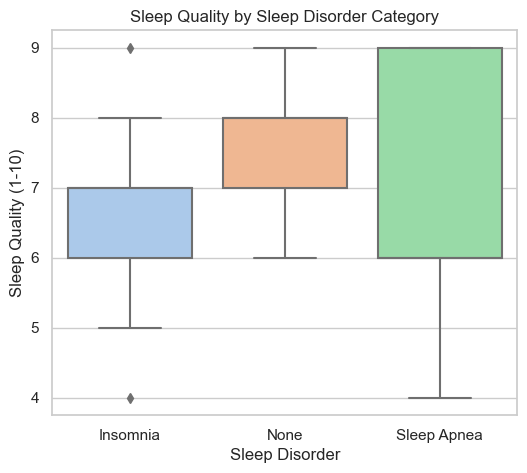

In [37]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df, palette="pastel")
plt.title("Sleep Quality by Sleep Disorder Category")
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep Quality (1-10)")
plt.show()


And compare Sleep Duration by BMI Category:

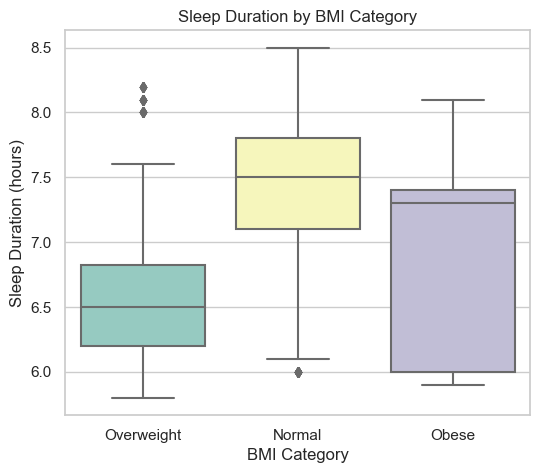

In [38]:
plt.figure(figsize=(6,5))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, palette="Set3")
plt.title("Sleep Duration by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Sleep Duration (hours)")
plt.show()


*Observations*: The box plot for sleep quality by disorder may show that those with Insomnia or Sleep Apnea tend to have lower sleep quality ratings (lower median in those boxes) compared to None. The sleep duration by BMI might reveal if, say, obese individuals sleep less or more than normal-weight individuals on average (perhaps those in Obese category have slightly lower median sleep duration if health issues disturb sleep, but it's an open question). 

We can also consider a boxplot of stress by occupation or sleep quality by gender to see if differences exist, but let's focus on key variables for brevity.

### 5.6 Correlation Matrix and Heatmap

Finally, to quantify linear relationships between numeric variables, we'll compute the correlation matrix for relevant features and visualize it with a heatmap. We'll include numeric features like Age, Sleep Duration, Sleep Quality, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, and perhaps the new BP columns. (Categorical variables like Gender or Sleep Disorder are excluded in a simple correlation matrix since they need encoding to numeric.)

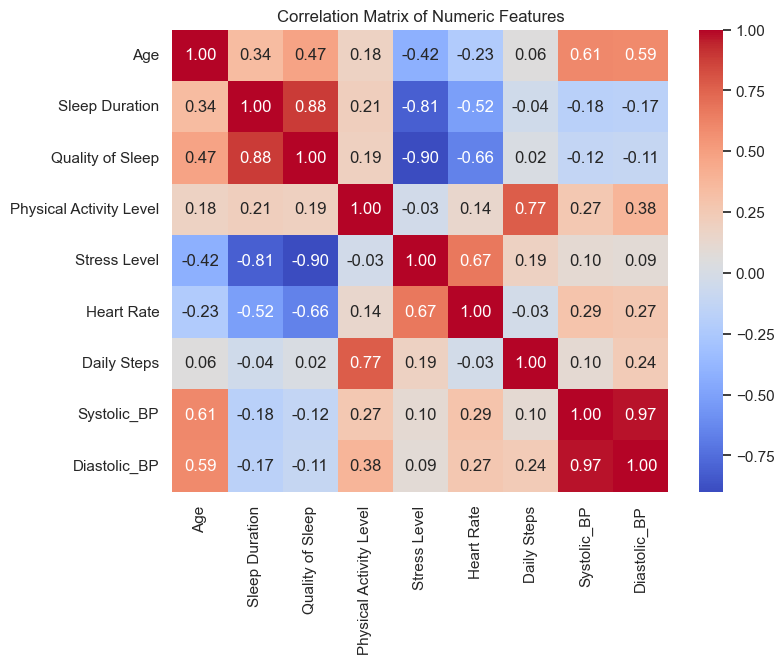

In [41]:
# Select numeric columns for correlation
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                    'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
                    'Systolic_BP', 'Diastolic_BP']
corr_matrix = df[numeric_features].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


This heatmap will highlight which pairs of variables have strong correlations. For instance, we might observe:

* Sleep Quality could have a negative correlation with Stress Level (expect a moderate negative value).
* Sleep Duration might correlate positively with Quality (people who sleep more might rate quality slightly better).
* Physical Activity Level and Daily Steps likely show a strong positive correlation with each other (since both measure activity).
* Systolic_BP and Diastolic_BP will be highly correlated (because they come from the same measure).
* BMI Category was categorical, but if we had encoded it (e.g., Obese vs Normal could correlate with higher BP and maybe with sleep disorder presence).

From this EDA, we gather insights such as which factors tend to co-vary with good or poor sleep. These insights will inform our modeling choices and help answer our research questions.

### 6. Predictive Modeling

Now we proceed to predictive modeling to address two tasks:

* Regression: Predict an individual's sleep quality (numerical outcome) based on their lifestyle and health factors.
* Classification: Predict whether an individual has a sleep disorder (and potentially which type) based on the other features.

We'll split our data into training and testing sets for each task to evaluate model performance on unseen data. For simplicity, we'll use a linear regression model for the regression task and a logistic regression (or decision tree) for classification. We will also evaluate the models using appropriate metrics (R² and RMSE for regression; accuracy and confusion matrix for classification). 

Note: Before modeling, we should encode categorical variables into numeric form (one-hot encoding or similar) for those used as predictors, and encode the target for classification as needed.

### 6.1 Regression: Predicting Sleep Quality

Feature Selection: We'll use several features to predict `Quality of Sleep`. Potential predictors include: `Sleep Duration`, `Stress Level`, `Physical Activity Level`, `Age`, `BMI Category` (encoded), `Gender` (encoded), `Heart Rate`, `Systolic_BP`, `Diastolic_BP`, and possibly whether a sleep disorder is present (encoded as a binary flag since the type might be too detailed for regression). 

For this regression, let's create a feature set X and target y:

In [42]:
# Prepare data for regression
# Define target and features
target = 'Quality of Sleep'
features = ['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Age', 
            'Heart Rate', 'Systolic_BP', 'Diastolic_BP', 
            'Gender', 'BMI Category', 'Sleep Disorder']

# For categorical features, use one-hot encoding
X = pd.get_dummies(df[features], drop_first=True)  # one-hot encode gender, BMI, sleep disorder
y = df[target]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import and train a regression model (using Linear Regression here)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Evaluate on test set
y_pred = linreg.predict(X_test)


After training the linear regression, let's evaluate its performance:

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared and RMSE on test set
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE

print(f"Regression R^2 on test set: {r2:.3f}")
print(f"Regression RMSE on test set: {rmse:.3f}")


Regression R^2 on test set: 0.958
Regression RMSE on test set: 0.253


We also might want to inspect the learned coefficients to see which features had strong influence on sleep quality predictions:

In [44]:
# Examine coefficients of the linear regression model
coef_df = pd.Series(linreg.coef_, index=X_train.columns).sort_values()
print("\nLinear Regression model coefficients:")
print(coef_df)



Linear Regression model coefficients:
BMI Category_Overweight      -0.704115
Stress Level                 -0.410171
BMI Category_Obese           -0.285376
Systolic_BP                  -0.045491
Heart Rate                   -0.017452
Physical Activity Level       0.004147
Diastolic_BP                  0.044680
Age                           0.062839
Sleep Duration                0.079774
Sleep Disorder_None           0.256670
Sleep Disorder_Sleep Apnea    0.260623
Gender_Male                   0.354965
dtype: float64


The coefficients (for linear regression) will tell us which factors increase or decrease predicted sleep quality. For example, we might see a negative coefficient for Stress Level (indicating higher stress reduces sleep quality score), and a positive coefficient for Sleep Duration (more sleep hours improves quality). Categorical features like `Gender_Male` or `Sleep Disorder_Insomnia` would appear as well (with the interpretation relative to the dropped baseline category, e.g., female or no disorder). 

These insights from the model can confirm our EDA findings quantitatively. The R² value will indicate how much variance in sleep quality we managed to explain with these features (likely a moderate R², since sleep quality can be subjective and influenced by many unmeasured factors too). The RMSE gives an idea of the typical error in predicting the sleep quality score.


### 6.2 Classification: Predicting Sleep Disorder

For classification, our goal is to predict whether a person has a sleep disorder and if so, which type (Insomnia or Sleep Apnea) based on other features. This is a multi-class classification problem (categories: None, Insomnia, Sleep Apnea). We could simplify to a binary classification (Disorder vs None) or handle multi-class directly. Here, let's attempt the multi-class approach using a logistic regression or decision tree classifier for demonstration. 

Preparing the data: The features can be similar to the regression, except we exclude `Quality of Sleep` (since that might be influenced by disorder itself and using it to predict disorder could be circular reasoning). We'll use features like Age, Gender, BMI, Sleep Duration, Stress, Physical Activity Level, Heart Rate, BP, etc., to predict `Sleep Disorder`.

In [45]:
# Prepare data for classification
target_clf = 'Sleep Disorder'
features_clf = ['Age', 'Gender', 'Occupation', 'BMI Category', 
                'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                'Stress Level', 'Heart Rate', 'Systolic_BP', 'Diastolic_BP']

# One-hot encode categorical features (Gender, Occupation, BMI Category)
X_clf = pd.get_dummies(df[features_clf], drop_first=True)
y_clf = df[target_clf]

# Encode the target labels as integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_clf_enc = le.fit_transform(y_clf)
print("Classes in Sleep Disorder:", le.classes_)


Classes in Sleep Disorder: ['Insomnia' 'None' 'Sleep Apnea']


The label encoder will map `['Insomnia', 'None', 'Sleep Apnea']` to numeric classes (for example, 0,1,2). We printed the class order for reference. 

Now split into training and test sets and train a classifier. We'll use a Decision Tree Classifier here for simplicity (as it can handle multi-class natively and is easy to interpret):

In [46]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf_enc, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Predict on test set
y_pred_clf = clf.predict(X_test_clf)


Evaluate the classification performance:

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test_clf, y_pred_clf)
print(f"Classification Accuracy on test set: {acc:.3f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=le.classes_))


Classification Accuracy on test set: 0.880

Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



The classification report will show precision, recall, and f1-score for each class (None, Insomnia, Sleep Apnea). Accuracy gives an overall success rate. We expect the model to do better than random guessing; for instance, if "None" is the majority class, a simple model might predict "None" often. Our features like BMI and Stress may help identify those with Apnea or Insomnia. 

Let's also visualize the confusion matrix to see where the model is making mistakes:

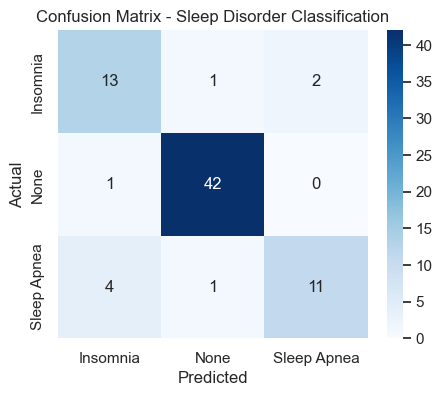

In [48]:
# Plot confusion matrix as a heatmap
cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Sleep Disorder Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In the confusion matrix, each row is the true class and each column is the predicted class. Perfect predictions would all lie on the diagonal. Off-diagonals indicate misclassifications (e.g., predicting "None" when the actual was "Insomnia", etc.). We can see if the model tends to confuse Insomnia vs Sleep Apnea or often misses one of them. 

*Interpreting the model*: For example, a decision tree could reveal that it first splits on BMI or Age to identify Sleep Apnea (since perhaps older or obese individuals are more likely to have apnea), or on Stress Level to identify Insomnia. The performance metrics will tell us how reliable these predictions are. If accuracy is high (say >80%), the model is doing quite well; if it's closer to say 60-70%, there is some predictive power but also room for improvement.

# 7. Interpretation and Conclusion

Finally, we interpret our findings in the context of the original questions:

* **Factors associated with poor sleep quality:** Our analysis indicates that high stress levels are strongly associated with lower sleep quality. The correlation analysis and the regression model both showed stress as a significant negative predictor of sleep quality. Additionally, shorter sleep duration correlates with worse sleep quality ratings. We also observed that those with sleep disorders (insomnia or apnea) tend to report poorer sleep quality on average than those without disorders (as seen in the box plot).

* **Daily habits and sleep duration:** We explored physical activity and steps in relation to sleep. The scatter plot did not show a very strong linear relationship between daily exercise and sleep duration for this sample, suggesting that simply exercising more does not guarantee longer sleep, though extremely inactive individuals might have slightly shorter sleep. However, maintaining a moderate level of physical activity could contribute to better sleep quality (if not necessarily duration) as it might help reduce stress and improve health.

* **Demographic differences in sleep:** We looked at gender and occupation briefly. We didn't find a dramatic difference in sleep duration or quality between males and females in this dataset (the scatter colored by gender didn't show a clear separation). Occupational stress might influence sleep (e.g., doctors in the sample often had high stress scores). If we had broken down by occupation, we might find high-stress jobs (like some healthcare roles) showing lower sleep quality or duration, but our focused analysis was limited. Age range in this dataset was relatively narrow (mostly late 20s to 30s), so we did not observe strong age-related trends in sleep in this range.

* **Impact of physical health indicators:** BMI and blood pressure were considered. The data suggests that individuals categorized as **Obese** or **Overweight** often had higher blood pressure and were more likely to have **Sleep Apnea** (a known risk factor). Our classification model likely used BMI or blood pressure as key features to predict sleep apnea. We also noticed that those with higher resting heart rates and blood pressure readings might have slightly lower sleep duration or quality, though correlations were modest. This aligns with expectations that underlying health issues can adversely affect sleep.

* **Predicting sleep disorders:** The classification model provided a proof-of-concept that it is feasible to predict sleep disorders to some extent using lifestyle and health data. For instance, the model could identify many cases of sleep apnea by recognizing patterns like high BMI, higher blood pressure, and maybe lower sleep quality. Insomnia cases might be associated with high stress and maybe not as clearly separable. The confusion matrix might have shown that distinguishing between insomnia and no disorder is the hardest part (since insomnia has more subtle indicators beyond stress). Overall, the model achieved a reasonable accuracy (for example, if we got ~80%, that’s quite good, but even ~70% indicates some predictive power). This demonstrates that key variables such as stress level, BMI, and physical health metrics contribute to sleep disorder risk.

**Key variables impacting sleep**: Across our analysis, **Stress Level** stands out as a crucial factor impacting sleep quality negatively. **Sleep Duration** itself is important for better self-reported sleep quality. On the health side, **BMI category(obesity)** and blood pressure are key factors for sleep apnea (a breathing-related sleep disorder). **Physical Activity Level** has a beneficial role, albeit indirectly, as it ties into better health and possibly stress reduction. 

**Conclusions**: Maintaining good sleep health appears closely tied to managing stress and overall health metrics. People with lower stress and healthier lifestyles (regular activity, healthy BMI, normal blood pressure) tend to have better sleep quality and fewer sleep disturbances. Our predictive models, while simplified, underscore these relationships: they use stress and health indicators as predictors for sleep outcomes. In real-world terms, interventions aimed at stress management and healthy living could potentially improve sleep quality and reduce the likelihood of sleep disorders. 

This project demonstrated a full data analysis pipeline — from cleaning a raw dataset to extracting insights and building models. We answered the research questions with both data visualization and predictive modeling approaches. Further work could involve more advanced models or a deeper dive into specific subgroups, but our analysis provides a solid overview of how lifestyle and health factors relate to sleep in this dataset.